In [ ]:
print('ACM-W Hackathon Finals')
print('**********************')

print('Team name:\n\tTechnocrats')
print('Team members:\n\tLakshmi Priya B (Team Leader)\n\tNivedhitha D\n\tSakthi Sairaj')

ACM-W Hackathon Finals
**********************
Team name:
	Technocrats
Team members:
	Lakshmi Priya B (Team Leader)
	Nivedhitha D
	Sakthi Sairaj


In [ ]:
from zipfile import ZipFile
file_name = '/content/sign-language-for-alphabets.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
!pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 78kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


['a/a_1.jpg', 'a/a_20.jpg']
['b/b_1.jpg', 'b/b_100.jpg']


 [[[ 0  0]]

 [[ 0 99]]

 [[97 99]]

 [[97  0]]]





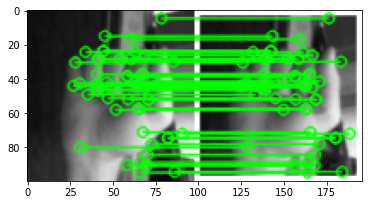

['a/a_1.jpg', 'a/a_1.jpg']

MATCH!!!!




Not enough matches are found - 0/20



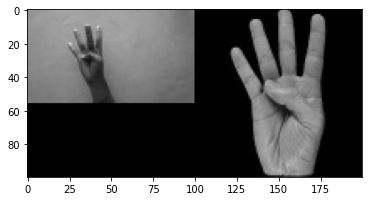

['b/b_1.jpg', 'b/b_100.jpg']

NO MATCH




TESTING

*****CONSOLIDATED TESTING REPORT******
Testcase  0 :  PASSED: MATCH
Testcase  1 :  FAILED: NO MATCH





In [ ]:
import os
os.chdir('/content/Sign Language for Alphabets')
import numpy as np
import cv2
from matplotlib import pyplot as plt

NO_MATCH = 0
SUCCESS = 1

def test(image1, image2):
    MIN_MATCH_COUNT = 20
    
    # cv2.imread(path, flag)
    # flag set to 0 specifies to load an image in grayscale mode
    
    img1 = cv2.imread(image1,0)   # queryImage - user's gesture screenshot
    img2 = cv2.imread(image2,0)   # trainImage - prestored
    
    # Initiate SIFT detector
    sift = cv2.xfeatures2d.SIFT_create()
    
    # find the keypoints and descriptors with SIFT
    kp1, des1 = sift.detectAndCompute(img1,None)
    kp2, des2 = sift.detectAndCompute(img2,None)
    
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
    search_params = dict(checks = 50)
    
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    
    matches = flann.knnMatch(des1,des2,k=2)
    
    # store all the good matches as per Lowe's ratio test.
    good = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            good.append(m)
            
    if len(good)>MIN_MATCH_COUNT:
        src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        matchesMask = mask.ravel().tolist()
    
        h,w = img1.shape
        displacement = w
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        
        boundpts = np.int32(dst)
        print('\n\n',boundpts)
        print('\n\n')
    
        img2 = cv2.polylines(img2,[boundpts],True,255,3, cv2.LINE_AA)
    
    else:
        print("\n\nNot enough matches are found - %d/%d\n" % (len(good),MIN_MATCH_COUNT))
        matchesMask = None
        displacement = -1
        
    draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                       singlePointColor = None,
                       matchesMask = matchesMask, # draw only inliers
                       flags = 2)
    
    img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
    #plt.savefig("output.png")
    
    plt.imshow(img3, 'gray'),plt.show()
    
    return displacement

def autoTesting(filename):
    result = []
    
    input_file = open(filename, 'r')
    read_inputs = input_file.read()
    testcases = [[t for t in testcase.split(' ')] for testcase in read_inputs.split('\n') if len(testcase)>0]
    
    for t in testcases:
        print(t)
    testcases = [['a/a_1.jpg', 'a/a_1.jpg'], ['b/b_1.jpg', 'b/b_100.jpg']]
        
    input_file.close()
    
    for testcase in testcases:
        image1=testcase[0]     # whole image -> GESTURE STORED IN DATABASE *****
        image2=testcase[1]     # sub image 1 -> USER GESTURE SCREENSHOT ******
        
        displacement = test(image2,image1)
        if displacement == -1:
            print(testcase)
            print("\nNO MATCH\n\n")
            result.append(NO_MATCH)
            continue
        
        
        else:
            print(testcase)
            print("\nMATCH!!!!\n\n")
            result.append(SUCCESS)
        
    
    print("\n\nTESTING")
    print("\n*****CONSOLIDATED TESTING REPORT******")
    
    report = ["FAILED: NO MATCH", "PASSED: MATCH"]
    for i in range(len(result)):
        print("Testcase ",i,": ", report[result[i]])
    print("\n\n")


#saved_poses user_gesture
#    .....
autoTesting('input.txt')


#inputs.txt  
#format: 
stored_gesture_image<spce>user_gesture_screenshot
.
.
.

Ex:
vr2.jpg initial2.jpg 
vr2.jpg initial2_r.jpg 
vr2.jpg initial2.jpg 
vr2.jpg initial2_distorted.jpg 
vr2.jpg wrong.png 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New Section